In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [6]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.AJEQW8_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.AJEQW8_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [8]:
nombres_clases= metadatos.features['label'].names


In [9]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

datos_entrenamiento=datos_entrenamiento.cache()
datos_pruebas=datos_pruebas.cache()

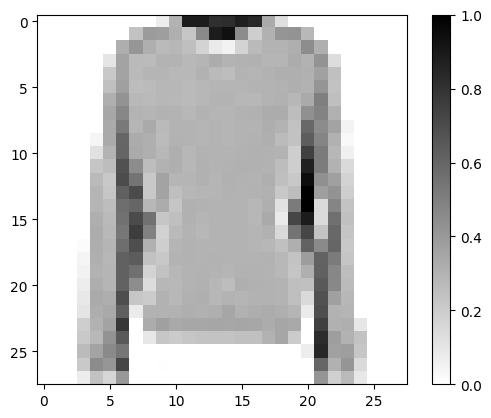

In [11]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


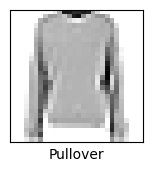

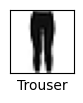

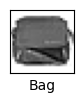

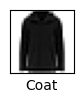

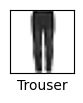

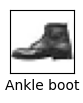

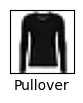

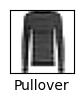

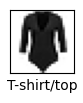

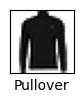

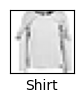

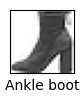

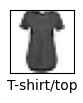

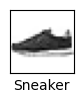

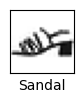

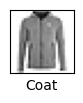

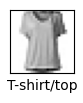

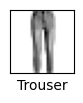

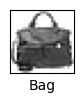

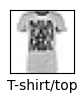

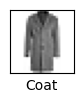

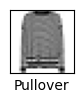

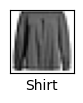

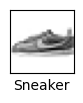

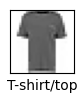

In [12]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen=imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
  plt.show()

In [13]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
 ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [15]:
num_ej_entrenamiento=metadatos.splits['train'].num_examples
num_ej_pruebas=metadatos.splits['test'].num_examples

In [16]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [17]:
TAMANO_LOTE = 32
datos_entrenamiento=datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas=datos_pruebas.batch(TAMANO_LOTE)

In [18]:
import math

historial=modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7605 - loss: 0.7049
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8549 - loss: 0.3974
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8716 - loss: 0.3478
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8748 - loss: 0.3413
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8853 - loss: 0.3097


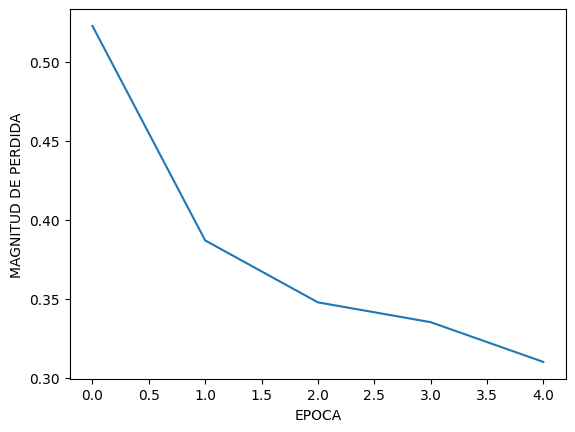

In [19]:
plt.xlabel('EPOCA')
plt.ylabel('MAGNITUD DE PERDIDA')
plt.plot(historial.history['loss'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


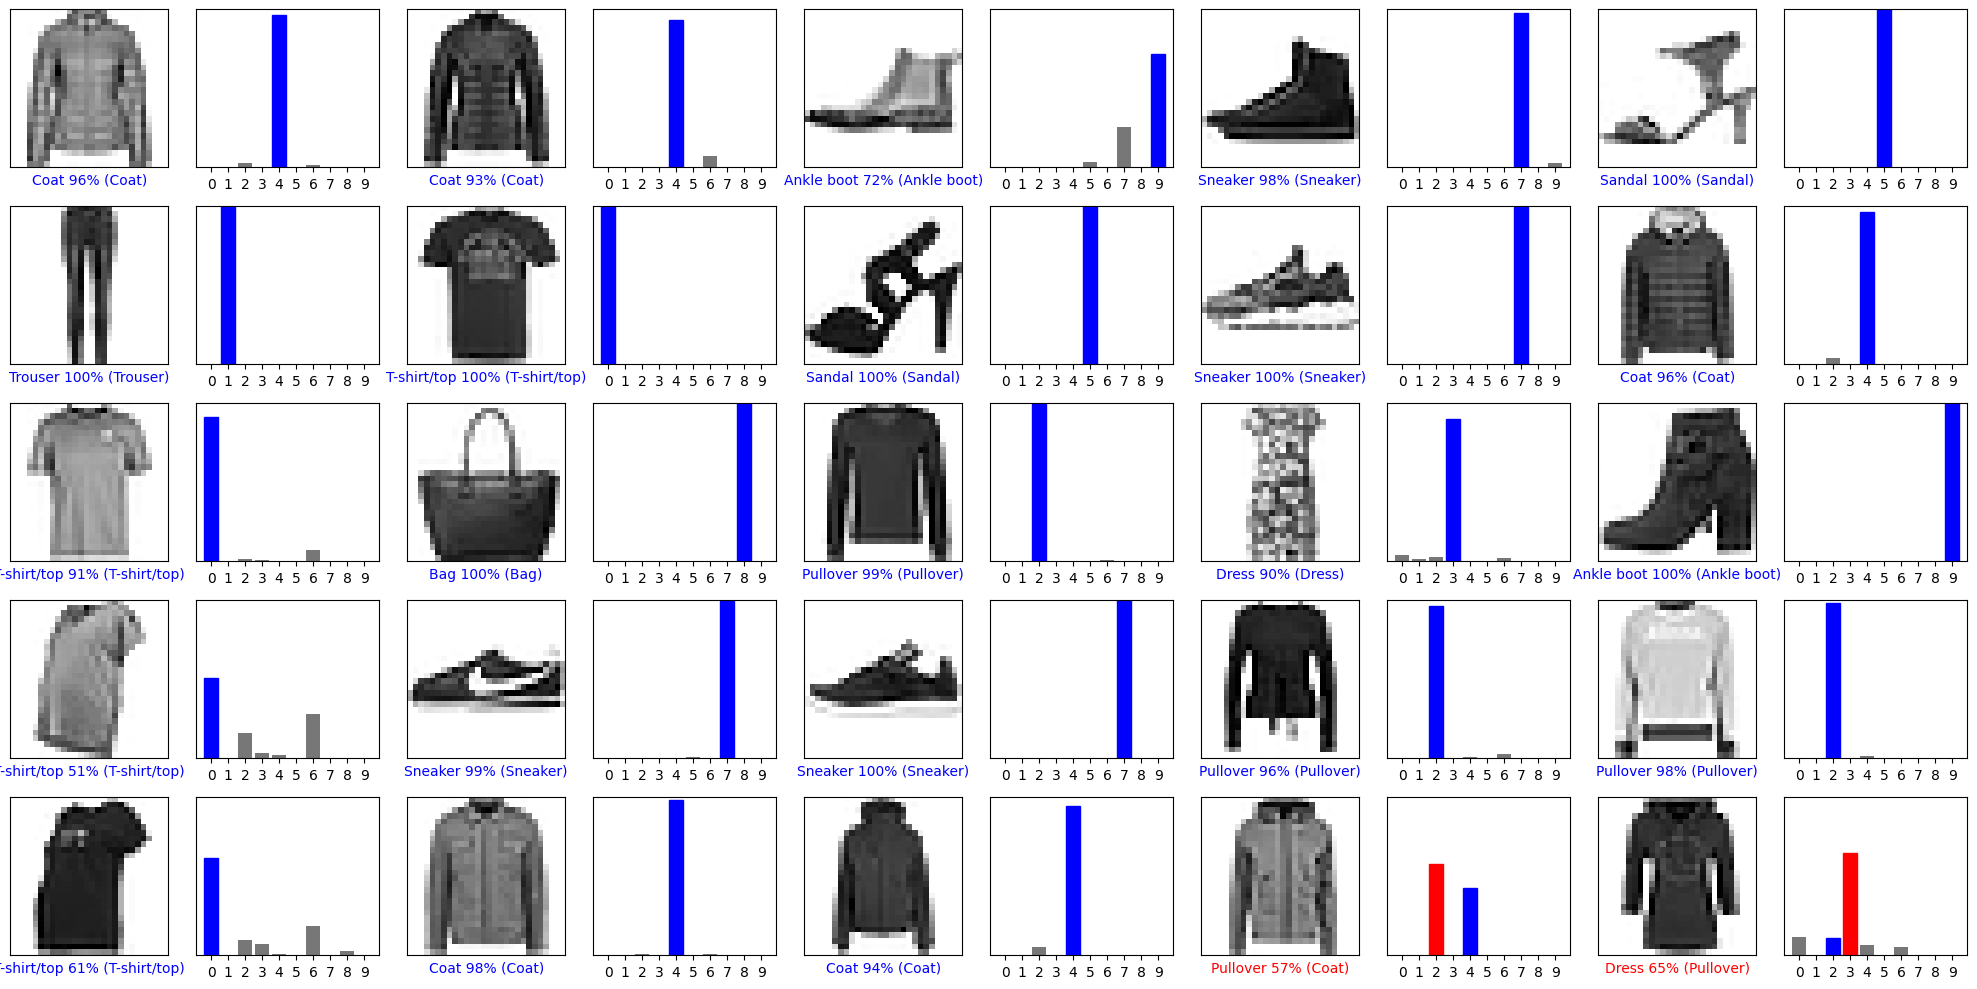

In [22]:
import numpy as np
import matplotlib.pyplot as plt


#OBTENER LOTE DE IMAGENES
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_pred = arr_predicciones[i]
    etiqueta_real = etiquetas_reales[i]
    img = imagenes[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    etiqueta_pred = np.argmax(arr_pred)
    color = 'blue' if etiqueta_pred == etiqueta_real else 'red'

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            nombres_clases[etiqueta_pred],
            100 * np.max(arr_pred),
            nombres_clases[etiqueta_real]
        ),
        color=color
    )

#BARRAS DE LAS PREDICCIONES
def graficar_valor_arreglo(i, arr_predicciones, etiquetas_reales):
    arr_pred = arr_predicciones[i]
    etiqueta_real = etiquetas_reales[i]

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    grafica = plt.bar(range(10), arr_pred, color="#777777")
    plt.ylim([0, 1])

    etiqueta_pred = np.argmax(arr_pred)
    grafica[etiqueta_pred].set_color('red')
    grafica[etiqueta_real].set_color('blue')

#MOSTRAR LAS PREDICCIONES
filas = 5
columnas = 5
num_imagenes = filas * columnas

plt.figure(figsize=(2 * 2 * columnas, 2 * filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2 * columnas, 2 * i + 1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2 * columnas, 2 * i + 2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

plt.tight_layout()
plt.show()
